# Итоговый проект по средней аналитеке
***
Как и любой бизнес, компания «Мегафон» хочет повысить удовлетворённость своих клиентов качеством услуг. Это важная задача для удержания пользователей — как давних, так и недавно привлечённых. Ведь затраты на маркетинг и продвижение не оправдаются, если клиент уйдёт из-за низкого качества связи. Однако в реальном мире ресурсы всегда ограничены, и в единицу времени технический отдел может решить конечное количество задач. 

Чтобы делать это наиболее эффективно, важно определить, какие технические показатели качества связи сильнее всего влияют на удовлетворённость клиентов, и в первую очередь направить ресурсы на работу с ними. Для этого «Мегафон» провёл опрос своих клиентов, предложив им оценить уровень удовлетворённости качеством связи. По каждому клиенту, прошедшему опрос, были собраны технические показатели. 

Подготовьте исследование для компании «Мегафон» и проанализируйте, как зависит (и зависит ли) оценка, которую ставит клиент в опросе, от технических показателей, которые были собраны. 



Более подробно о проведённом опросе:

В ходе опроса компания «Мегафон» предложила своим клиентам оценить уровень удовлетворённости качеством связи по десятибалльной шкале (где 10 — это «отлично», а 1 — «ужасно»). Если клиент оценивал качество связи на 9 или 10 баллов, опрос заканчивался. Если клиент ставил оценку ниже 9, задавался второй вопрос — о причинах неудовлетворённости качеством связи с предоставленными пронумерованными вариантами ответа. Ответ можно было дать в свободном формате или перечислить номера ответов через запятую. Ниже вы можете ознакомиться с инфографикой по структуре опроса.

*Обратите, пожалуйста, внимание, что для работы вам даны реальные данные, что может повлечь необходимость в дополнительной их обработке.*

<img src="./Megafon.png" width=1000 height=1000/>


### Набор данных.

Причины низкой оценки (не более 8 баллов).<br>

- 1 - Недозвоны, обрывы при звонках
- 2 - Время ожидания гудков при звонке
- 3 - Плохое качество связи в зданиях, торговых центрах и т. п.
- 4 - Медленный мобильный интернет
- 5 - Медленная загрузка видео
- 6 - Затрудняюсь ответить
- 7 - Свой вариант

Total Traffic(MB) - Общий трафик (МБ)<br>
Downlink Throughput(Kbps) - Пропускная способность канала загрузки (кбит/с)<br>
Uplink Throughput(Kbps) - Пропускная способность канала отправки (кбит/с)<br>
Downlink TCP Retransmission Rate(%) - Скорость повторной передачи TCP по нисходящему каналу (%)<br>
Video Streaming Download Throughput(Kbps) - Скорость загрузки потокового видео (кбит/с)<br>
Video Streaming xKB Start Delay(ms) - Задержка запуска потокового видео xKB (мс)<br>
Web Page Download Throughput(Kbps) - Скорость загрузки веб-страницы (кбит/с)<br>
Web Average TCP RTT(ms) - Среднее значение "пинга" загрузки страницы в Интернете (мс)<br>

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import re

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.feature_selection import SelectKBest, f_classif

from statsmodels.stats.proportion import proportions_ztest
from scipy import stats #shapiro mannwhitneyu
from scipy.stats import norm
# from tqdm.auto import tqdm

# 1. Загрузим данные и проверим их качество #

In [2]:
df = pd.read_csv('megafon.csv')
print(df.shape)
df.head()

(3112, 11)


user_id Q1       Q2  Total Traffic(MB)  Downlink Throughput(Kbps)  \
0        1  5      NaN          775.48846                     360.13   
1        2  5        4          861.96324                    3023.54   
2        3  1        4          261.11860                     790.96   
3        4  8        3          179.18564                    2590.97   
4        5  2  2, 3, 4          351.99208                     731.61   

   Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)  \
0                    86.56                                 3.93   
1                   411.18                                 1.27   
2                    34.20                                 1.79   
3                   325.88                                 0.80   
4                   223.54                                 1.15   

   Video Streaming Download Throughput(Kbps)  \
0                                    1859.15   
1                                     667.47   
2                                    1079.60   
3                                    7053.81   
4                                    4550.38   

   Video Streaming xKB Start Delay(ms)  Web Page Download Throughput(Kbps)  \
0                                 2309                             1007.82   
1                                 2080                              255.36   
2                                 6367                              535.85   
3                                 3218                             1221.02   
4                                 1767                             2336.56   

   Web Average TCP RTT(ms)  
0                       83  
1                      425  
2                      485  
3                       51  
4                       68

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   user_id                                    3112 non-null   int64  
 1   Q1                                         3110 non-null   object 
 2   Q2                                         1315 non-null   object 
 3   Total Traffic(MB)                          3112 non-null   float64
 4   Downlink Throughput(Kbps)                  3112 non-null   float64
 5   Uplink Throughput(Kbps)                    3112 non-null   float64
 6   Downlink TCP Retransmission Rate(%)        3112 non-null   float64
 7   Video Streaming Download Throughput(Kbps)  3112 non-null   float64
 8   Video Streaming xKB Start Delay(ms)        3112 non-null   int64  
 9   Web Page Download Throughput(Kbps)         3112 non-null   float64
 10  Web Average TCP RTT(ms) 

В столбце "Q2" всего 1315 записей. <br>
В столбце "Q1" всего 2 пропуска.

In [4]:
df.describe()

user_id  Total Traffic(MB)  Downlink Throughput(Kbps)  \
count  3112.000000        3112.000000                3112.000000   
mean   1556.500000         406.282339                2220.774023   
std     898.501345         220.593815                2629.824405   
min       1.000000         100.026680                  13.260000   
25%     778.750000         214.261192                 652.297500   
50%    1556.500000         363.999720                1404.230000   
75%    2334.250000         572.524325                2823.645000   
max    3112.000000         887.078270               39817.640000   

       Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)  \
count              3112.000000                          3112.000000   
mean                170.702381                             1.834518   
std                 204.031286                             2.074593   
min                   6.110000                             0.050000   
25%                  70.735000                             0.720000   
50%                 119.435000                             1.300000   
75%                 210.617500                             2.240000   
max                4141.850000                            31.200000   

       Video Streaming Download Throughput(Kbps)  \
count                                3112.000000   
mean                                 5728.806848   
std                                  5161.475235   
min                                     0.000000   
25%                                  2324.550000   
50%                                  4436.500000   
75%                                  7611.440000   
max                                 58566.030000   

       Video Streaming xKB Start Delay(ms)  \
count                          3112.000000   
mean                           2107.596080   
std                            1582.423057   
min                             239.000000   
25%                            1280.000000   
50%                            1672.000000   
75%                            2312.000000   
max                           21392.000000   

       Web Page Download Throughput(Kbps)  Web Average TCP RTT(ms)  
count                         3112.000000              3112.000000  
mean                          2100.258901               194.195051  
std                           2062.509549               267.387914  
min                              0.000000                 0.000000  
25%                           1018.002500                74.000000  
50%                           1670.695000               118.000000  
75%                           2519.987500               207.000000  
max                          35603.970000              3471.000000

Среди данных по параметрам, видим явные отличия между средним и медианным значением. Это может говорить о присутствии выбросов или о несимметричном распределении.

<AxesSubplot:>

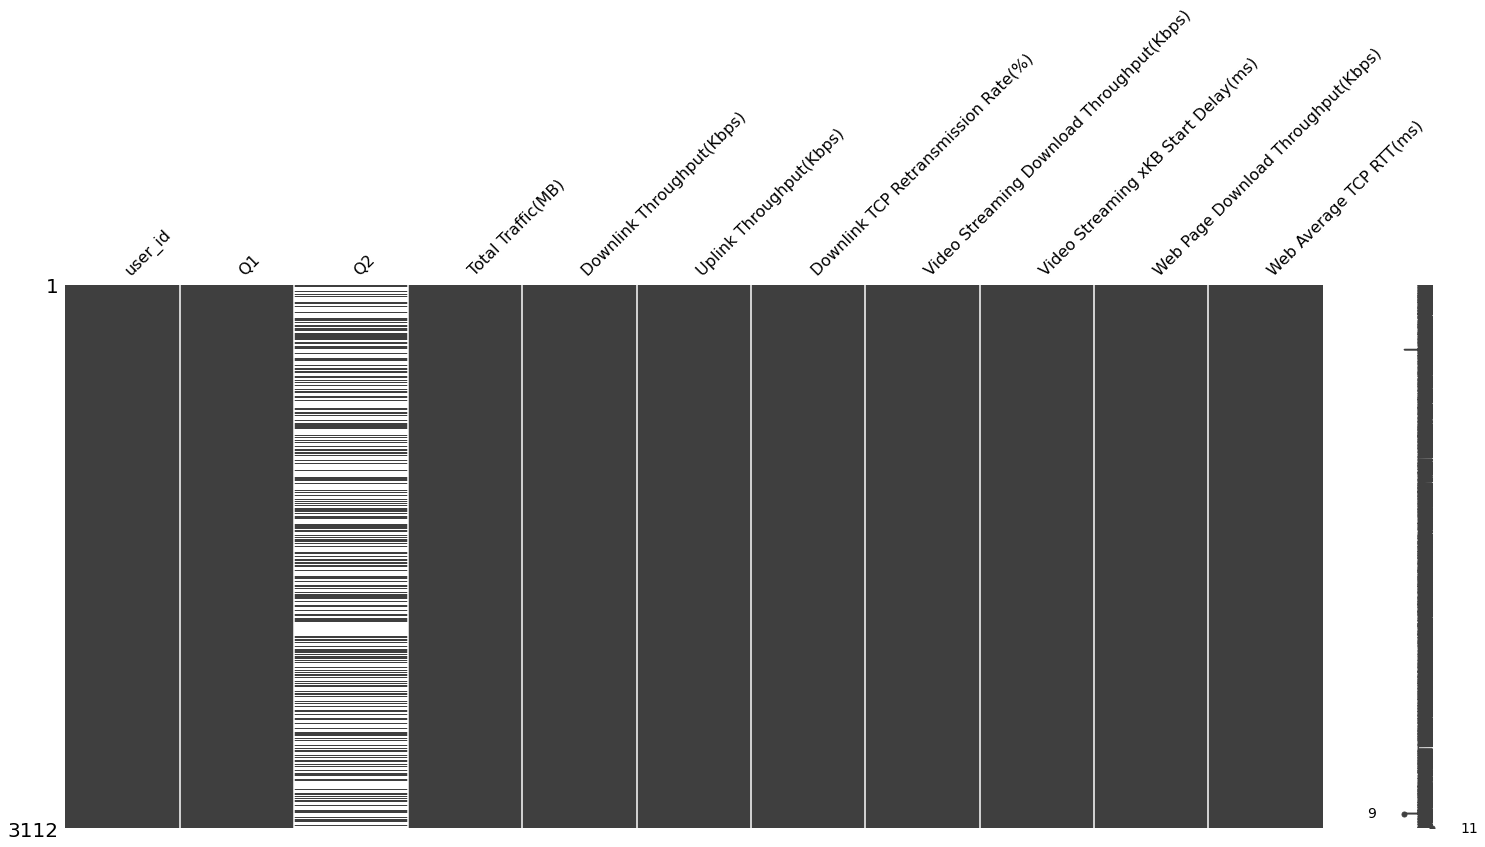

In [5]:
msno.matrix(df)

## 1.1 Проверим уникальность данных

In [6]:
#количество уникальных записей в таблице
df.user_id.nunique()

3112

In [7]:
df.Q1.unique()

array(['5', '1', '8', '2', '3', '9', '10', '7', '4', '11', '6', '2, 9',
       '0', '1, 3', '19', '15', nan, '1, 6', '***** ** ***',
       '3 - дер.Ширяево Волоколамского района, 9 - в Москве', '10, 9',
       'Чем даль ше,тем лучше.Спасибо за ваш труд.Оценка 10 !',
       'ОЦЕНКА-3/НЕВАЖНО/', 'Отвратительно',
       'Я ценой услуг не удовлетворен', 'Пока не понял', '3, 9', '5, 6',
       '0, 1, 5', '5, 7', 'Hi',
       '4. Тульская область Заокский район. Романовские дачи связи почти нет',
       'Немагу дать атценку денги незашто снимаеть скоро выклучаю',
       '10, 50',
       'Очень  хорошо. Обслуживания  я довольно. Спасибо вам.555', '?',
       'Поохое',
       'Когда в Москве-10 а когда в калужской области в деревне Бели-1',
       'Нет', 'Да', 'Ужасно',
       '3 тройка, связь отвратительная, жалко платить за такой тарив',
       'Чдтчдтччдтччч', '3, 7', '20, 89031081392', '1, 8', 'Без з',
       '10, 5', '2, 5',
       'Я в Смол. Области живу сейчас, не пользуюсь телефоном с

Не все люди отвечали однозначно оценкой на качество связи.

In [8]:
#Уникальные значения на вопрос о причинах низкой оценки (ниже 9)
df.Q2.unique()

array([nan, '4', '3', '2, 3, 4', '4, 5', '1, 3, 4', '1, 3, 4, 5', '1, 3',
       '3, 4', '1, 2', '3, 5', '1', '7', '1, 4', '1, 2, 3, 4, 5', '2, 3',
       '1, 2, 3, 4', '2, 3, 4, 5', '3, 4, 5', '1, 2, 5', '1, 5',
       '1, 2, 4', '6', '1, 4, 5', '1, 2, 3', '2, 5', '2, 4, 5', '1, 2, 7',
       '5', '2', '1, 2, 3, 4, 5, 6', '0, 1, 7', '4, 7', '1, 4, 7', '0, 3',
       '1, 3, 4, 5, 7', '3, 7', '1, 3, 4, 7', '3, 4, 5, 7', '2, 4',
       '5, 6', '1, 2, 3, 5', '1, 3, 5', '1, 2, 34', '1, 2, 4, 5',
       '0, 05, 2, 27, 7', '1, 3, 7', '3, 4, 7', '1, 2, 3, 4, 7', '10',
       '0', '1, 2, 3, 7'], dtype=object)

Ответы на второй вопрос о причинах низкой оценки гораздо чище.

In [9]:
# Сделаем список валидных ответов на первый вопрос.
answer1=[str(x) for x in list(range(1,11))]
# Посмотрим на ответы на второй вопрос при неоднозначных ответах на первый вопрос.
df[~df['Q1'].isin(answer1)].Q2.unique()

array([nan], dtype=object)

In [10]:
df[~df['Q1'].isin(answer1)].shape[0]/df.shape[0]*100

1.7352185089974295

Все ответы на первый вопрос с неоднозначным значением составляют всего 1.7% от всего опроса. При этом повторный вопрос о причинах низкой оценки таким клиентам не задавался. <br>
Значит сделаем фильтр для неоднозначных ответов на первый вопрос.

## 1.2 Подготовим данные для дальнейшего анализа

In [11]:
# Зделаем фильтр по данным в столбце Q1 и приведем его к формату целых чисел.
df_q1 = df[df['Q1'].isin(answer1)]
df_q1.loc[:,'Q1'] = df_q1.loc[:,'Q1'].astype(int)

C:\Users\Alexey\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [12]:
df_q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3058 entries, 0 to 3111
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   user_id                                    3058 non-null   int64  
 1   Q1                                         3058 non-null   int32  
 2   Q2                                         1315 non-null   object 
 3   Total Traffic(MB)                          3058 non-null   float64
 4   Downlink Throughput(Kbps)                  3058 non-null   float64
 5   Uplink Throughput(Kbps)                    3058 non-null   float64
 6   Downlink TCP Retransmission Rate(%)        3058 non-null   float64
 7   Video Streaming Download Throughput(Kbps)  3058 non-null   float64
 8   Video Streaming xKB Start Delay(ms)        3058 non-null   int64  
 9   Web Page Download Throughput(Kbps)         3058 non-null   float64
 10  Web Average TCP RTT(ms) 

In [13]:
# Приведем данные в столбце Q2 к формату списка для удобства преобразования их в дальнейшем.
df_q1.loc[:,'Q2'] = df_q1.loc[:,'Q2'].apply(lambda x: x.replace(' ', '').split(',') if isinstance(x, str) else x)

In [14]:
df_q1.shape

(3058, 11)

# 2. Разведочный анализ данных (EDA).

## 2.1 Рассмотрим распределение данных

### 2.1.1 Распределение оценок качества связи

In [15]:
# Рассмотрим распределение по оценкам качества связи.
Q1_count = df_q1.groupby(['Q1'])[['user_id']].count().reset_index()
Q1_count.columns = ['Q1', 'Q1_count']
Q1_count['Q1_count_proc'] = round(Q1_count.Q1_count/Q1_count.Q1_count.sum() * 100, 2)
fig_1 = px.bar(Q1_count, x='Q1', y='Q1_count_proc',
             text_auto='.3s', title='Распределение оценок в процентном оношении')
fig_1.update_layout(xaxis_title='Оценка качества связи', yaxis_title='Количество, %')
fig_1.update_xaxes(tickvals=list(range(1,11)))
fig_1.show()

Заметим, что 28 процентов ответов соответствуют высшей оценке 10 баллов и почти 18% - минимальной (1 балл).

Разделим ответы на две группы:

1) Неудовлетворены качеством связи "0" (оценка меньше 9) <br>
2) Удовлетворены качеством связи "1" (оценка больше 8)

In [16]:
# Добавим столбец "Group" с идетификатором групп 1 и 2.
df_q1['Group'] = df_q1.Q1.apply(lambda x: 1 if x>8 else 0)

C:\Users\Alexey\AppData\Local\Temp/ipykernel_17356/3404851783.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
Q1_count = df_q1.groupby(['Group'])[['user_id']].count().reset_index()
Q1_count.columns = ['Group', 'Q1_count']
Q1_count['Q1_count_proc'] = round(Q1_count.Q1_count/Q1_count.Q1_count.sum() * 100, 2)

fig_2 = px.pie(Q1_count, names='Group', values='Q1_count_proc',
             title='Распределение оценок в процентном оношении', hole=.5)
fig_2.show()

Почти 65% пользователей не удовлетворены качеством связи.

## 2.2 Рассмотрим распределение технических параметров.

In [18]:
col_name = ['Total Traffic(MB)', 'Downlink Throughput(Kbps)',
       'Uplink Throughput(Kbps)', 'Downlink TCP Retransmission Rate(%)',
       'Video Streaming Download Throughput(Kbps)',
       'Video Streaming xKB Start Delay(ms)',
       'Web Page Download Throughput(Kbps)', 'Web Average TCP RTT(ms)']

In [19]:
# Построим гистограммы распределения
fig_3 = make_subplots(rows=4, cols=2, subplot_titles=(col_name))

n = 0
for row in range(1,5):
    for col in range(1,3):
        fig_3.add_trace(go.Histogram(x=df_q1[col_name[n]]), row=row, col=col)
        n=n+1

fig_3.update_layout(showlegend=False)
fig_3.update_layout(height=900, width=800)
fig_3.show()

Заметим, что все графики имеют скошенность вправо. Так же видно, что это происходит из-за выбросов.  
Применим правило трех сигм  — **68–95–99.7** для всех технических параметров, кроме суммарного трафика.

In [20]:
df_q1_desc = df_q1.describe()
df_q1_desc

user_id           Q1  Total Traffic(MB)  Downlink Throughput(Kbps)  \
count  3058.000000  3058.000000        3058.000000                3058.000000   
mean   1555.906148     6.030412         405.754542                2216.485419   
std     898.077976     3.463826         220.475485                2619.415557   
min       1.000000     1.000000         100.026680                  13.260000   
25%     778.250000     3.000000         213.006655                 653.772500   
50%    1554.500000     7.000000         363.753705                1404.685000   
75%    2334.750000    10.000000         572.792975                2823.205000   
max    3112.000000    10.000000         887.078270               39817.640000   

       Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)  \
count              3058.000000                          3058.000000   
mean                170.619277                             1.836161   
std                 204.734202                             2.066941   
min                   6.110000                             0.050000   
25%                  70.447500                             0.720000   
50%                 119.385000                             1.300000   
75%                 210.632500                             2.250000   
max                4141.850000                            31.200000   

       Video Streaming Download Throughput(Kbps)  \
count                                3058.000000   
mean                                 5733.784153   
std                                  5162.077982   
min                                     0.000000   
25%                                  2323.080000   
50%                                  4432.620000   
75%                                  7618.285000   
max                                 58566.030000   

       Video Streaming xKB Start Delay(ms)  \
count                          3058.000000   
mean                           2112.244931   
std                            1591.029564   
min                             239.000000   
25%                            1285.250000   
50%                            1672.500000   
75%                            2312.750000   
max                           21392.000000   

       Web Page Download Throughput(Kbps)  Web Average TCP RTT(ms)  \
count                         3058.000000              3058.000000   
mean                          2096.273257               194.385219   
std                           2048.797613               268.874605   
min                              0.000000                 0.000000   
25%                           1018.190000                74.000000   
50%                           1671.145000               118.000000   
75%                           2518.262500               206.000000   
max                          35603.970000              3471.000000   

             Group  
count  3058.000000  
mean      0.354480  
std       0.478434  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [21]:
# Сделаем копию данных и фильтруем исходный набор данных
df_q1_99=df_q1.copy()

for name in col_name[1:]:
    df_q1_99 = df_q1_99[df_q1[name]<(3*df_q1_desc.loc['std', name])]

C:\Users\Alexey\AppData\Local\Temp/ipykernel_17356/1190290216.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [22]:
df_q1_99.describe()

user_id           Q1  Total Traffic(MB)  Downlink Throughput(Kbps)  \
count  2441.000000  2441.000000        2441.000000                2441.000000   
mean   1557.298238     6.039328         410.965812                1857.904420   
std     899.056670     3.458194         221.596569                1572.613363   
min       1.000000     1.000000         100.026680                  28.330000   
25%     777.000000     3.000000         216.178560                 667.640000   
50%    1550.000000     7.000000         368.767720                1366.610000   
75%    2336.000000    10.000000         584.028970                2590.970000   
max    3112.000000    10.000000         885.376090                7750.860000   

       Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)  \
count              2441.000000                          2441.000000   
mean                151.626571                             1.620598   
std                 111.259945                             1.173768   
min                  10.060000                             0.080000   
25%                  72.530000                             0.770000   
50%                 118.670000                             1.300000   
75%                 202.400000                             2.150000   
max                 603.360000                             6.190000   

       Video Streaming Download Throughput(Kbps)  \
count                                2441.000000   
mean                                 5016.507337   
std                                  3257.772505   
min                                     0.000000   
25%                                  2520.920000   
50%                                  4372.870000   
75%                                  7009.660000   
max                                 15436.630000   

       Video Streaming xKB Start Delay(ms)  \
count                          2441.000000   
mean                           1864.530520   
std                             767.718448   
min                             375.000000   
25%                            1323.000000   
50%                            1676.000000   
75%                            2190.000000   
max                            4772.000000   

       Web Page Download Throughput(Kbps)  Web Average TCP RTT(ms)  \
count                         2441.000000              2441.000000   
mean                          1834.822151               163.272429   
std                           1081.345578               129.183155   
min                              0.000000                 0.000000   
25%                           1050.470000                77.000000   
50%                           1646.700000               119.000000   
75%                           2381.000000               201.000000   
max                           6116.780000               798.000000   

             Group  
count  2441.000000  
mean      0.354773  
std       0.478542  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [23]:
print ('Количество записей осталось: ', df_q1_99.shape[0])

Количество записей осталось:  2441


### Проверим данные после применения правила

In [24]:
tmp_df = df_q1_99.groupby(['Group'])[['user_id']].count().reset_index()
tmp_df.columns = ['Group', 'Q1_count']
tmp_df['Q1_count_proc'] = round(tmp_df.Q1_count/tmp_df.Q1_count.sum() * 100, 2)

fig_2 = px.pie(tmp_df, names='Group', values='Q1_count_proc',
             title='Распределение оценок в процентном отношении', hole=.5)
fig_2.show()

Отлично! Соотношение классов не изменилось после удаления выбросов из данных.

In [25]:
fig_3 = make_subplots(rows=4, cols=2, subplot_titles=(col_name))

n = 0
for row in range(1,5):
    for col in range(1,3):
        fig_3.add_trace(go.Histogram(x=df_q1_99[col_name[n]]), row=row, col=col)
        n=n+1

fig_3.update_layout(showlegend=False)
fig_3.update_layout(height=900, width=800)
fig_3.update_layout(xaxis_title='Значения параметра', yaxis_title='Плотность')
fig_3.show()

Теперь гораздо лучше!  
  
  Скошенность в право ссохраняется, что говорит о несимметричности распределения.

### Посмотрим на медианные величины параметров по группам

Для несимметричного распределения в качестве средней оценки вернее пользоваться медианным значением.

In [26]:
df_q1_99_median = df_q1_99.groupby('Group')[col_name].agg('median').reset_index()
fig_4 = make_subplots(rows=4, cols=2, subplot_titles=(col_name))

n = 0
for row in range(1,5):
    for col in range(1,3):
        fig_4.add_trace(go.Bar(x=df_q1_99_median['Group'], y=df_q1_99_median[col_name[n]], text=round(df_q1_99_median[col_name[n]],2)),
        row=row, col=col)
        n=n+1

fig_4.update_layout(showlegend=False)
fig_4.update_layout(height=900, width=800)
fig_4.update_xaxes(tickvals=list(range(0,2)))
fig_4.show()

Видим, что отличия в медианных значениях есть, **но на сколько они значимы для постановки низкой оценки**?

### Посмотрим, как распределяются между собой группы.

C:\Users\Alexey\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



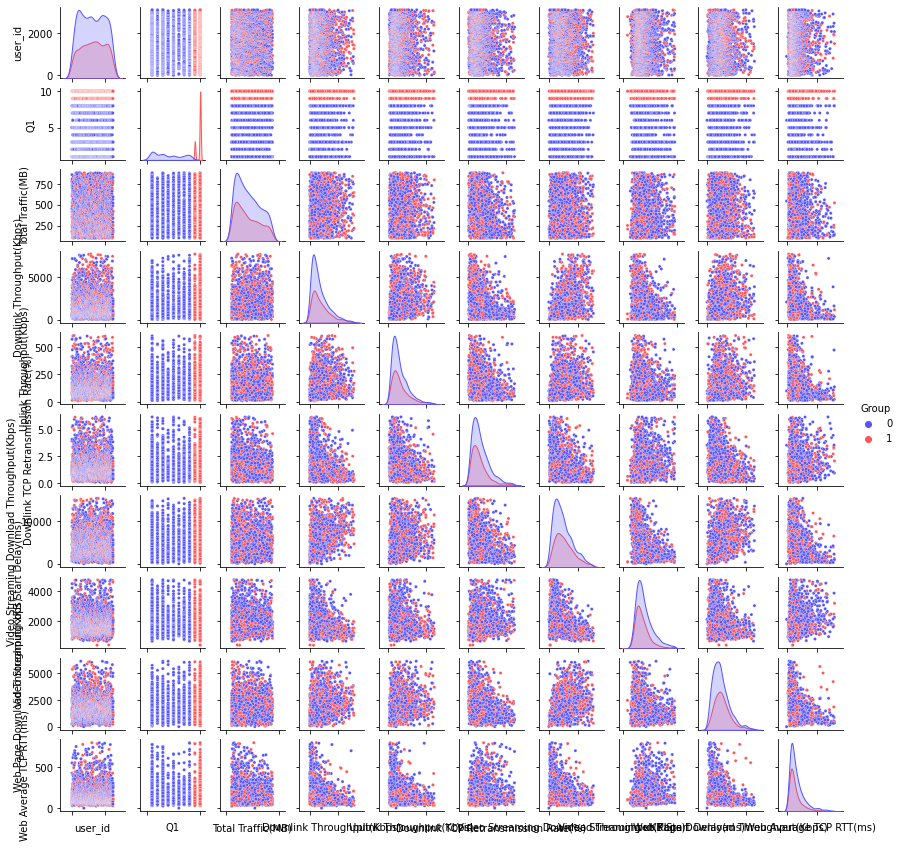

In [27]:
g = sns.pairplot(df_q1_99, 
                 hue='Group', palette = 'seismic', size=1.2, plot_kws=dict(s=10))
g.set(xticklabels=[])

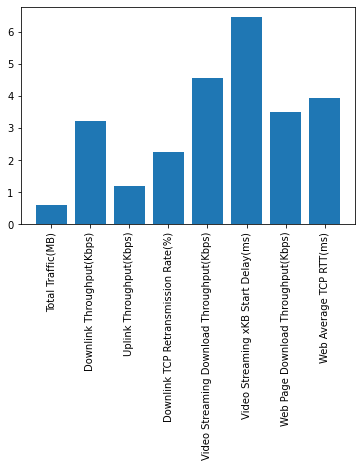

In [28]:
selector = SelectKBest(f_classif, k=5)
selector.fit(df_q1_99[col_name], df_q1_99["Group"])

scores = -np.log10(selector.pvalues_)

plt.bar(range(len(df_q1_99[col_name].columns)), scores)
plt.xticks(range(len(df_q1_99[col_name].columns)), df_q1_99[col_name].columns, rotation='vertical')
plt.show()

**Предварительно можно сказать, что наибольшее влияние на оценку оказывала задерка воспроизведения онлайн видео.**

In [29]:
tmp_df = df_q1_99.groupby('Q1').median().reset_index()

# fig, axes = plt.subplots(4,2, sharex=False, squeeze=False, figsize=(15,15))
# for ax,q in zip(axes.ravel(), col_name):
#     sns.lineplot(data=tmp_df, x='Q1', y=q, ax=ax)
#     ax.set_title(q)
# plt.show()

fig_6 = make_subplots(rows=4, cols=2, subplot_titles=(col_name))

n = 0
for row in range(1,5):
    for col in range(1,3):
        fig_6.add_trace(go.Scatter(x=tmp_df['Q1'], y=tmp_df[col_name[n]], text=round(tmp_df[col_name[n]],2)),
        row=row, col=col)
        n=n+1

fig_6.update_layout(showlegend=False)
fig_6.update_layout(height=900, width=800)
fig_6.update_xaxes(tickvals=list(range(0,11)))
fig_6.show()

## 2.3 Причины низких оценок по ответам пользователей (Q2)

In [30]:
# Преобразуем ответы на второй вопрос
df_q2 = df_q1_99.explode('Q2')
print(df_q2[(df_q2['Q2'].isnull())&(df_q2['Q1']<=8)].shape)
df_q2 = df_q2[~df_q2['Q2'].isnull()]
df_q2.loc[:,'Q2'] = df_q2.Q2.astype(int)
print(df_q2[(df_q2['Q2']==0)|(df_q2['Q2']>7)].shape)
df_q2 = df_q2[(df_q2['Q2']!=0)&(df_q2['Q2']<=7)]

(544, 12)
(7, 12)


In [31]:
q2_answer = {1:'1-Недозвоны, обрывы при звонках', 2:'2-Время ожидания гудков при звонке',
             3:'3-Плохое качество связи в зданиях, торговых центрах и т. п.', 4:'4-Медленный мобильный интернет',
            5:'5-Медленная загрузка видео', 6:'6-Затрудняюсь ответить', 7:'7-Свой вариант'}

Всего 544 пользователя с оценкой не более 8 не ответили о причине низкой оценки и 7 человек ответили некорректно. Так же отфильтруем данные, оставив только валидные ответы.

In [32]:
tmp_df = df_q2.groupby('Q2')[['user_id']].count().reset_index()
tmp_df['count_proc'] = round((tmp_df.user_id/tmp_df.user_id.sum())*100, 2)
tmp_df['Q2'] = tmp_df['Q2'].map(q2_answer)
fig_5 = px.pie(tmp_df, names ='Q2', values = 'count_proc', 
              title='Распределение по ответам по причинам низкой оценки', hole=0.5)
fig_5.show()

**Явно можно выделить три категории наиболее частых ответов:**
- Плохое качество связи в зданиях, торговых центрах и т. п.
- Недозвоны, обрывы при звонках
- Медленный мобильный интернет

# 3. Постановка и проверка гипотез

Проверим влиянием технических параметров на оценку пользователей

In [33]:
# Сделаем копию данных
data = df_q1_99.copy()

## 3.1 Нормальность распределения

Проверим количественные данные (технические параметры) на нормальнность распределения с помощью критерия Шапиро-Уилка.

In [34]:
# Создадим 
def norm_raspred(data, group):
    print('Проверка распределения на нормальность. \nРаспределение нормальное, если p>0.05 \n')
    for i in data[group].unique():
        print('\n Группа ', i, '--- n=', data[data[group]==i].shape[0])
        for feature in data.columns[3:11]:
            shapiro_test = stats.shapiro(data[data[group]==i][feature].to_numpy())
            p_val = shapiro_test.pvalue
            alpha = 0.05
            if p_val>alpha:
                print('{}: \t p_value = {} > 0.05  => \t Распределение нормальное.'.format(feature, p_val))
            else:
                print('{}: \t p_value = {} < 0.05 => \t Распределение несимметричное.'.format(feature, p_val))

In [35]:
norm_raspred(data, 'Group')

Проверка распределения на нормальность. 
Распределение нормальное, если p>0.05 


 Группа  0 --- n= 1575
Total Traffic(MB): 	 p_value = 1.7028268669705713e-24 < 0.05 => 	 Распределение несимметричное.
Downlink Throughput(Kbps): 	 p_value = 5.581976695926826e-35 < 0.05 => 	 Распределение несимметричное.
Uplink Throughput(Kbps): 	 p_value = 8.609791282340243e-35 < 0.05 => 	 Распределение несимметричное.
Downlink TCP Retransmission Rate(%): 	 p_value = 5.318863320415652e-32 < 0.05 => 	 Распределение несимметричное.
Video Streaming Download Throughput(Kbps): 	 p_value = 2.1941817870588498e-26 < 0.05 => 	 Распределение несимметричное.
Video Streaming xKB Start Delay(ms): 	 p_value = 1.0764883861440544e-30 < 0.05 => 	 Распределение несимметричное.
Web Page Download Throughput(Kbps): 	 p_value = 1.0210293526044626e-27 < 0.05 => 	 Распределение несимметричное.
Web Average TCP RTT(ms): 	 p_value = 1.1545157917725735e-40 < 0.05 => 	 Распределение несимметричное.

 Группа  1 --- n= 866
Total Traf

**Вывод:** Так как распределение несимметричное и всего две независимые группы, то оценку различий между группами будем выполнять с помощью непараметрического критерия Манна-Уитни.  
Различия будем считать статистически значимыми при p <= 0.05

## 3.2 Сформулируем гипотезу для первого вопроса и проверим ее.

### Гипотеза 1.

**H0:** Оценка пользователя не зависит от технических параметров<br>
<br>
**H1:** Оценка пользователя зависит от технических параметров<br>


Так как распределние данных несимметричное, то в качестве основной характеристики является медиана. 

In [36]:
# Процентное соотношение медиан групп
df_q1_99_median_diff = df_q1_99_median.T.copy()
df_q1_99_median_diff['Diff_median, %']=(df_q1_99_median.T[1]-df_q1_99_median.T[0])/df_q1_99_median.T[1]*100
df_q1_99_median_diff

0          1  \
Group                                         0.0000     1.0000   
Total Traffic(MB)                           378.7188   355.8683   
Downlink Throughput(Kbps)                  1294.6600  1536.0250   
Uplink Throughput(Kbps)                     116.4600   121.3200   
Downlink TCP Retransmission Rate(%)           1.3300     1.2400   
Video Streaming Download Throughput(Kbps)  4100.9200  4797.5550   
Video Streaming xKB Start Delay(ms)        1706.0000  1582.0000   
Web Page Download Throughput(Kbps)         1584.1200  1768.0400   
Web Average TCP RTT(ms)                     128.0000   109.0000   

                                           Diff_median, %  
Group                                          100.000000  
Total Traffic(MB)                               -6.421055  
Downlink Throughput(Kbps)                       15.713611  
Uplink Throughput(Kbps)                          4.005935  
Downlink TCP Retransmission Rate(%)             -7.258065  
Video Streaming Download Throughput(Kbps)       14.520626  
Video Streaming xKB Start Delay(ms)             -7.838180  
Web Page Download Throughput(Kbps)              10.402480  
Web Average TCP RTT(ms)                        -17.431193

Заметим, что наибольшее отличие между группами в качестве звязи наблюдается в скорости загрузки данных и видео, задержке открытия страницы.

In [37]:
# Распределение медиан и квантилей тех. параметров по группам
fig_7 = make_subplots(rows=4, cols=2, subplot_titles=(col_name))

n = 0
for row in range(1,5):
    for col in range(1,3):
        fig_7.add_trace(go.Box(y=data[data['Group']==0][col_name[n]], name="Группа 0"), row=row, col=col)
        fig_7.add_trace(go.Box(y=data[data['Group']==1][col_name[n]], name="Группа 1"), row=row, col=col)
        n=n+1

fig_7.update_layout(showlegend=False)
fig_7.update_layout(height=1100, width=800)
fig_7.update_xaxes(tickvals=list(range(0,2)))
fig_7.show()

In [38]:
# Функция для проверки статистической значимости по критерию Манна-Уитни
def manna_uitni(data, col, group='Group'):
    data_manna = pd.DataFrame()
    for feature in col:
        statis, pvalue = stats.mannwhitneyu(data[data[group]==data[group].unique()[0]][feature], data[data[group]==data[group].unique()[1]][feature])
        #print(feature, pvalue)
        if pvalue<0.05:
            data_manna = data_manna.append({'Feature':feature, 'P_value':pvalue, 'Conclusion':'Статистически значимые различия'}, ignore_index=True) 
            #print ('Значимые различия \n')
        else:
            data_manna = data_manna.append({'Feature':feature, 'P_value':pvalue, 'Conclusion':'Статистически незначимые различия'},  ignore_index=True) 
            #print('Не значимые различия \n')
    return data_manna

In [39]:
data_manna = manna_uitni(data, col_name)
data_manna

Feature       P_value  \
0                          Total Traffic(MB)  1.459213e-01   
1                  Downlink Throughput(Kbps)  3.694991e-04   
2                    Uplink Throughput(Kbps)  1.480546e-01   
3        Downlink TCP Retransmission Rate(%)  1.414397e-03   
4  Video Streaming Download Throughput(Kbps)  5.561746e-06   
5        Video Streaming xKB Start Delay(ms)  1.275254e-07   
6         Web Page Download Throughput(Kbps)  3.821712e-06   
7                    Web Average TCP RTT(ms)  2.333651e-06   

                          Conclusion  
0  Статистически незначимые различия  
1    Статистически значимые различия  
2  Статистически незначимые различия  
3    Статистически значимые различия  
4    Статистически значимые различия  
5    Статистически значимые различия  
6    Статистически значимые различия  
7    Статистически значимые различия

**Вывод:** Согласно тесту Манна-Уитни почти по всем техническим показателям, кроме Total Traffic(MB) и Uplink Throughput(Kbps) имеются значимые статистические различия между группами пользователей, которые удовлетворены качеством связи и, которые не удовлетворены.

### Проверим гипотезу при помощи Бутсрэп  

Считаем разлия статистически значимыми, если нулевое значение разницы средних значений не поадает в 95% процентный интервал распределения.

In [40]:
# Функция для расчета бутсрэп.
def bootstrap(data, col_name, N=1000, func=np.mean):
    n = 1000
    res = []
    df_stat = pd.DataFrame()
    df_p = pd.DataFrame()
    fig = make_subplots(rows=4, cols=2, subplot_titles=(col_name))
    n_col = 0
    for feature in col_name:
        for _ in range(N):
            boot_0 = np.random.choice(data[data['Group']==0][feature], size=n)
            boot_1 = np.random.choice(data[data['Group']==1][feature], size=n)
            stat = func(boot_1)-func(boot_0)
            res.append(stat)
        print(len(res), feature)
        df_stat[feature] = res
        res=[]
    for row in range(1,5):
        for col in range(1,3):
            p_1 = norm.cdf(x = 0, loc = np.mean(df_stat[col_name[n_col]]), scale = np.std(df_stat[col_name[n_col]]))
            p_2 = norm.cdf(x = 0, loc = -np.mean(df_stat[col_name[n_col]]), scale = np.std(df_stat[col_name[n_col]]))
            p_value = min(p_1, p_2) * 2
            if p_value<0.05:
                df_p = df_p.append({'Feature':col_name[n_col], 'P_value':p_value, 'Conclusion':'Статистически значимые различия'}, ignore_index=True) 
                #print ('Значимые различия \n')
            else:
                df_p = df_p.append({'Feature':col_name[n_col], 'P_value':p_value, 'Conclusion':'Статистически незначимые различия'},  ignore_index=True) 
                #print('Не значимые различия \n')
                
            
            fig.add_trace(go.Histogram(x=df_stat[col_name[n_col]]), row=row, col=col)
            fig.add_vline(x=np.percentile(df_stat[col_name[n_col]], 2.5), 
                          line_width=3, line_dash="dash", line_color="red", row=row, col=col)
            fig.add_vline(x=np.percentile(df_stat[col_name[n_col]], 97.5),
                          line_width=3, line_dash="dash", line_color="red", row=row, col=col)
            n_col = n_col+1
    
    fig.update_layout(xaxis_title='Отклонение от среднего', yaxis_title='Плотность')
    fig.update_layout(showlegend=False)
    fig.update_layout(height=1000, width=900)
    
    fig.update_traces(opacity=0.75)
    fig.show()
    return df_p

In [41]:
df_boot = bootstrap(data, col_name=col_name, func=np.mean)
df_boot

1000 Total Traffic(MB)
1000 Downlink Throughput(Kbps)
1000 Uplink Throughput(Kbps)
1000 Downlink TCP Retransmission Rate(%)
1000 Video Streaming Download Throughput(Kbps)
1000 Video Streaming xKB Start Delay(ms)
1000 Web Page Download Throughput(Kbps)
1000 Web Average TCP RTT(ms)


Feature       P_value  \
0                          Total Traffic(MB)  2.904984e-01   
1                  Downlink Throughput(Kbps)  8.045338e-04   
2                    Uplink Throughput(Kbps)  7.861467e-02   
3        Downlink TCP Retransmission Rate(%)  7.385467e-03   
4  Video Streaming Download Throughput(Kbps)  8.888027e-05   
5        Video Streaming xKB Start Delay(ms)  7.449803e-07   
6         Web Page Download Throughput(Kbps)  6.081422e-04   
7                    Web Average TCP RTT(ms)  2.286929e-04   

                          Conclusion  
0  Статистически незначимые различия  
1    Статистически значимые различия  
2  Статистически незначимые различия  
3    Статистически значимые различия  
4    Статистически значимые различия  
5    Статистически значимые различия  
6    Статистически значимые различия  
7    Статистически значимые различия

**Вывод:** Метод бутсрэп подтверждает полученные результаты с помощью непараметрического метода Манна-Уитни о том, что разница в уровне технических параметров имеются значимые статистические различия между группами пользователей, которые удовлетворены качеством связи и, которые не удовлетворены.

H0 отвергаем на 0.05 уровне значимости на имеющихся данных.  
H1 не отвергаем на 0.05 уровне значимости на имеющихся данных  

**Оценка пользователей о качестве связи и интернета зависит от технических показателей сети. Наибольшее влияние оказывает скорость загрузки и время до начала воспроизведения онлайн-видео (Video Streaming Download Throughput(Kbps), Video Streaming xKB Start Delay(ms))**
***

## 3.3 Сформулируем гипотезу для вопроса о причинах низкой оценки и проверим ее.

### Гипотеза 2.

**H0:** Ответы пользователей о причине низкой оценки не зависят от технических параметров<br>
<br>
**H1:** Ответы пользователей о причине низкой оценки зависят от технических параметров<br>


In [42]:
# Посмотрим на данные по ответам на второй вопрос
df_q2.head()

user_id  Q1  Q2  Total Traffic(MB)  Downlink Throughput(Kbps)  \
1        2   5   4          861.96324                    3023.54   
3        4   8   3          179.18564                    2590.97   
4        5   2   2          351.99208                     731.61   
4        5   2   3          351.99208                     731.61   
4        5   2   4          351.99208                     731.61   

   Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)  \
1                   411.18                                 1.27   
3                   325.88                                 0.80   
4                   223.54                                 1.15   
4                   223.54                                 1.15   
4                   223.54                                 1.15   

   Video Streaming Download Throughput(Kbps)  \
1                                     667.47   
3                                    7053.81   
4                                    4550.38   
4                                    4550.38   
4                                    4550.38   

   Video Streaming xKB Start Delay(ms)  Web Page Download Throughput(Kbps)  \
1                                 2080                              255.36   
3                                 3218                             1221.02   
4                                 1767                             2336.56   
4                                 1767                             2336.56   
4                                 1767                             2336.56   

   Web Average TCP RTT(ms)  Group  
1                      425      0  
3                       51      0  
4                       68      0  
4                       68      0  
4                       68      0

In [43]:
fig_5.show()

### Проверим группы (7 групп) на нормальность распределения.

In [44]:
norm_raspred(df_q2, 'Q2')

Проверка распределения на нормальность. 
Распределение нормальное, если p>0.05 


 Группа  4 --- n= 474
Total Traffic(MB): 	 p_value = 1.6153522746850668e-12 < 0.05 => 	 Распределение несимметричное.
Downlink Throughput(Kbps): 	 p_value = 1.557012083648794e-20 < 0.05 => 	 Распределение несимметричное.
Uplink Throughput(Kbps): 	 p_value = 8.084574116996326e-21 < 0.05 => 	 Распределение несимметричное.
Downlink TCP Retransmission Rate(%): 	 p_value = 2.6056961882112496e-17 < 0.05 => 	 Распределение несимметричное.
Video Streaming Download Throughput(Kbps): 	 p_value = 4.662683017057955e-15 < 0.05 => 	 Распределение несимметричное.
Video Streaming xKB Start Delay(ms): 	 p_value = 4.2271713922273813e-16 < 0.05 => 	 Распределение несимметричное.
Web Page Download Throughput(Kbps): 	 p_value = 1.5034473501272268e-16 < 0.05 => 	 Распределение несимметричное.
Web Average TCP RTT(ms): 	 p_value = 2.1863327319854655e-23 < 0.05 => 	 Распределение несимметричное.

 Группа  3 --- n= 585
Total Traff

Почти все выборки имеют несимметричное распределение кроме группы 6 (пользователи с ответом "Затрудняюсь ответить") из-за малого количества таких ответов (всего 9 ответов). Примем, что все выборки имеют не симметричное распределение.

**Так как нам необходимо проверить более двух независимых выборок с несимметричным распределением, то применим критерий Краскела-Уоллиса.**

In [45]:
# Функция Краскела-Уолиса
def kruskal_uollis(data, col, group=None):
    data_kruskal = pd.DataFrame()
    for feature in col:
        statis, pvalue = stats.kruskal(data[data['Q2']==1][feature], data[data['Q2']==2][feature], data[data['Q2']==3][feature],
                                      data[data['Q2']==4][feature],data[data['Q2']==5][feature],data[data['Q2']==6][feature],
                                      data[data['Q2']==7][feature])
        #print(feature, pvalue)
        if pvalue<(0.05):
            data_kruskal = data_kruskal.append({'Feature':feature, 'P_value':pvalue, 'Conclusion':'Статистически значимые различия'}, ignore_index=True) 
            #print ('Значимые различия \n')
        else:
            data_kruskal = data_kruskal.append({'Feature':feature, 'P_value':pvalue, 'Conclusion':'Статистически незначимые различия'},  ignore_index=True) 
            #print('Не значимые различия \n')
    return data_kruskal

In [46]:
data_kruskal = kruskal_uollis(df_q2, col_name)
data_kruskal

Feature   P_value  \
0                          Total Traffic(MB)  0.222229   
1                  Downlink Throughput(Kbps)  0.002952   
2                    Uplink Throughput(Kbps)  0.151256   
3        Downlink TCP Retransmission Rate(%)  0.077603   
4  Video Streaming Download Throughput(Kbps)  0.000033   
5        Video Streaming xKB Start Delay(ms)  0.010237   
6         Web Page Download Throughput(Kbps)  0.001933   
7                    Web Average TCP RTT(ms)  0.015113   

                          Conclusion  
0  Статистически незначимые различия  
1    Статистически значимые различия  
2  Статистически незначимые различия  
3  Статистически незначимые различия  
4    Статистически значимые различия  
5    Статистически значимые различия  
6    Статистически значимые различия  
7    Статистически значимые различия

**Вывод:** Заметим, что по параметрам загрузки интернет-страниц и онлайн-видео есть статистически значимые различия при  
p <= 0.05 между группами. К сожалению, тест Краскела-Уоллиса не говорит между какими конкретно группами есть различия и в какую сторону.

**Для определения различий между группами применим попарно тест Манна-Уитни. Различия будем считать статистически значимыми при p <= 0.05/7 (пересчет на число групп).**

In [47]:
# Применим метод Манна-Уитни попарно, кроме группы 6, так как малая выборка.
data_manna_q2 = pd.DataFrame()
n=2
for feature in col_name:
    for i in range(1,8):
        for j in range(n,8):
            if j==6:
                continue
            statis, pvalue = stats.mannwhitneyu(df_q2[df_q2['Q2']==i][feature],df_q2[df_q2['Q2']==j][feature])
            #print(feature, pvalue)
            if pvalue<0.05/7:
                data_manna_q2 = data_manna.append({'Q2':i, 'Feature':feature, 'P_value':pvalue, 'Conclusion':'Значимые различия'}, ignore_index=True) 
                print (feature, 'Значимые различия', i, j)
            else:
                data_manna_q2 = data_manna.append({'Q2':i, 'Feature':feature, 'P_value':pvalue, 'Conclusion':'Не значимые различия'},  ignore_index=True) 
                #print('Не значимые различия \n', i, j)
        n+=1
    n=2
#data_manna_q2.sort_values(by='Q2').reset_index(drop=True)

Downlink Throughput(Kbps) Значимые различия 1 5
Downlink Throughput(Kbps) Значимые различия 3 5
Video Streaming Download Throughput(Kbps) Значимые различия 1 4
Video Streaming Download Throughput(Kbps) Значимые различия 1 5
Video Streaming Download Throughput(Kbps) Значимые различия 3 5
Video Streaming Download Throughput(Kbps) Значимые различия 5 7
Video Streaming xKB Start Delay(ms) Значимые различия 1 5
Video Streaming xKB Start Delay(ms) Значимые различия 3 5
Web Page Download Throughput(Kbps) Значимые различия 1 4
Web Page Download Throughput(Kbps) Значимые различия 1 5
Web Page Download Throughput(Kbps) Значимые различия 3 4
Web Page Download Throughput(Kbps) Значимые различия 3 5


В основном получили статистически значимые различия при p <=0.05/7 при сравнении с группами 4 и 5. Заметим, что только ответы "4-Медленный мобильный интернет" и "5-Медленная загрузка видео" относятся к проблемам с интернетам. Другие ответы считаем, что проблемы пользователей с качеством связи.

**Сгруппируем ответы на второй вопрос на две группы. Ответы 1,2,3,6,7 относятся к проблемам с мобильной связи, а ответы 4, 5 относятся к проблемам с загрузкой интернета.**

In [48]:
# Группируем ответы
df_q2['Group_q2'] = df_q2['Q2'].apply(lambda x: 'Моб. связь' if x in [1,2,3,6,7] else 'Интернет')

In [49]:
# Применим метод Манна-Уитни на p<=0.05 уровне значимости
manna_uitni(df_q2, col_name, group='Group_q2')

Feature   P_value  \
0                          Total Traffic(MB)  0.059107   
1                  Downlink Throughput(Kbps)  0.003031   
2                    Uplink Throughput(Kbps)  0.009347   
3        Downlink TCP Retransmission Rate(%)  0.477327   
4  Video Streaming Download Throughput(Kbps)  0.000003   
5        Video Streaming xKB Start Delay(ms)  0.000185   
6         Web Page Download Throughput(Kbps)  0.000013   
7                    Web Average TCP RTT(ms)  0.001526   

                          Conclusion  
0  Статистически незначимые различия  
1    Статистически значимые различия  
2    Статистически значимые различия  
3  Статистически незначимые различия  
4    Статистически значимые различия  
5    Статистически значимые различия  
6    Статистически значимые различия  
7    Статистически значимые различия

**Вывод:** Наибольшее влияние оказывает скорость загрузки и время до начала воспроизведения онлайн-видео и загрузка интернет-страницы.

Гипотеза 2: <br>
H0 отвергаем на 0.05 уровне значимости на имеющихся данных.  
H1 не отвергаем на 0.05 уровне значимости на имеющихся данных  

**Оценка пользователей о причинах низкой оценки качества сети зависит от технических показателей.**
***

### Как отличаются технические показатели пользователей по выделенным группам?

In [50]:
# Найдем медианные значения параметров по группам
df_q2.groupby('Group_q2')[col_name].median()

Total Traffic(MB)  Downlink Throughput(Kbps)  \
Group_q2                                                   
Интернет            404.07541                    1109.97   
Моб. связь          369.01779                    1276.10   

            Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)  \
Group_q2                                                                   
Интернет                     107.55                                 1.42   
Моб. связь                   118.73                                 1.40   

            Video Streaming Download Throughput(Kbps)  \
Group_q2                                                
Интернет                                      3363.09   
Моб. связь                                    4113.14   

            Video Streaming xKB Start Delay(ms)  \
Group_q2                                          
Интернет                                 1839.0   
Моб. связь                               1713.0   

            Web Page Download Throughput(Kbps)  Web Average TCP RTT(ms)  
Group_q2                                                                 
Интернет                               1363.48                    140.0  
Моб. связь                             1582.84                    127.0

In [51]:
df_q2.groupby('Group_q2').user_id.count()

Group_q2
Интернет       651
Моб. связь    1319
Name: user_id, dtype: int64

In [52]:
# Распределение медиан и квантилей тех. параметров по группам
fig_10 = make_subplots(rows=4, cols=2, subplot_titles=(col_name))

n = 0
for row in range(1,5):
    for col in range(1,3):
        fig_10.add_trace(go.Box(y=df_q2[df_q2['Group_q2']=='Интернет'][col_name[n]], name="Интернет"), row=row, col=col)
        fig_10.add_trace(go.Box(y=df_q2[df_q2['Group_q2']=='Моб. связь'][col_name[n]], name="Моб. связь"), row=row, col=col)
        n=n+1

fig_10.update_layout(showlegend=False)
fig_10.update_layout(height=1100, width=800)
fig_10.update_xaxes(tickvals=list(range(0,2)))
fig_10.show()

**Заметим, что у пользователей, которые ответили о проблеме с интернетом почти все медианные показатели по загрузке видео и интренет-страниц ниже, что у пользователей, которые говорят о проблемах с качеством телефонных звонков. При этом пользователи группы "Интернет" в медианном значении больше пользуются интернетом (выше медиана по параметру Total Traffic(MB)).**
***

# 4. Вывод.

1. При рассмотрении двух групп пользователей, как "Удовслетворенные" и "Неудовлетворенные" качеством связи видим **явные различия в показателях технических параметрах**. Это говорит о том, что ставя оценку пользователи в основном руководствовались именно качеством связи, а не субьективным отношением к компании.



2. Наибольшее влияние на оценку оказывает **скорость загрузки видео и время ожидания начала воспроизведения видео**. На это следует обратить внимание технической службе.



3. При вопросе о причинах низкой оценке качества связи пользователи **в основном указывали "плохое качество связи в здании", "недозвоны" и "медленный интернет"**. Но даже между группами с такими ответами есть значимые различия по значениям технических показателей. Так разделяя все ответы на две группы, первая которая указывает на плохое качество звонков и вторая, которая указывает на медленную скорость интернета и загрузку видео видим значимые различия в показателях. **У пользователей с ответами о плохой скорсти интернета показатели скорости загрузки ниже, а время ожидания загрузки больше**. Технической поддержке необходимо проверить качество соединения у таких пользователей, а клиентской службе предложить таким пользователям более выгодные тариф с большей скоростью интернета.



4. При рассмотрении ответов пользователей в свободной форме можно заметить, что есть жалобы на зону покрытия сети при выезде в другие области или деревни. Возможно, такой ответ о причинах низкой оценки следут добавить в опрос.